In [20]:
import numpy as np
import pandas as pd
from numpy.random import seed
seed(1)

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import pickle
import warnings
warnings.filterwarnings("ignore")
import os
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import sys
sys.path.append('../cycle_prediction/')
from weibull_utils import plot_predictions_insights,weibull_pdf, weibull_mode
from weibull_utils import plot_top_predictions
from t2e import t2e

In [22]:
path = '../data/'

a = os.path.join(path,'helpdesk.csv')
a = pd.read_csv(a)
b = os.path.join(path,'bpi_12_w.csv')
b = pd.read_csv(b)
c = os.path.join(path,'bpi_12_w_no_repeat.csv')
c = pd.read_csv(c)
d = os.path.join(path,'env_permit.csv')
d = pd.read_csv(d)

df_name = {
    'a':'helpdesk',
    'b':'bpi_12_w',
    'c':'bpi_12_w_no_repeat',
    'd':'env_permit'
}

df_dict = {
    'a': a,
    'b': b,
    'c': c,
    'd': d
}
range_dict = {
    'a': range(2,8,1),
    'b': range(2,22,2),
    'c': range(2,12,2),
    'd': range(2,22,2)
}

In [23]:
dataset='b'
res='d'
censored=True
cen_per=0.5
fit_type:'t2e'
transform = False
prefix=6
##########################################################
print("\ndataset:", dataset, "\tprefix:", prefix)

t2e_obj = t2e(df_dict[dataset],
              prefix = prefix,
              resolution = res,
              censored = censored,
              cen_prc = cen_per,
              fit_type = 't2e',
              transform = transform
             )
t2e_obj.preprocess_dev()
X_train, X_test, X_val, y_train, y_test, y_val, len_train, len_val, len_test = t2e_obj.smart_split(train_prc = 0.7,
                                                                                                     val_prc = 0.45,
                                                                                                      scaling=True)
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)


dataset: b 	prefix: 6
all cases 4308
first 10 censored cases [199369 207116 187957 174824 208997 189481 200689 191572 207527 193906]
	Total Observed: 2154
	Training data Observed: 829
	Training data Censored: 2154
	Training data to use: 2983
	Validation data: 678
	Testing data   : 647
(2983, 6, 8) (647, 6, 8) (678, 6, 8) (2983, 2) (647, 2) (678, 2)


In [24]:
print("Layer size:",8, end = " ..... ")
t2e_obj.fit(X_train, y_train, X_val, y_val,size=8, vb = True)
print("Done")
print("Training accomplished in", t2e_obj.fit_time, "seconds")
try:
    test_result_df, mae, accuracy = t2e_obj.evaluate(X_test,y_test)
    print('power:', t2e_obj.power)
    print(len(test_result_df['T_pred'].unique()), 'unique predictions')
    print(np.round(mae,3), 'mae')
except:
    print('evaluation failed')

Layer size: 8 ..... 

Epoch 1/500
23/24 [===========================>..] - ETA: 0s - loss: 1.4095
Epoch 00001: val_loss improved from inf to 3.81470, saving model to output/best_model.h5
24/24 [==============================] - 2s 86ms/step - loss: 1.4570 - val_loss: 3.8147
Epoch 2/500
23/24 [===========================>..] - ETA: 0s - loss: 1.2452
Epoch 00002: val_loss improved from 3.81470 to 3.80482, saving model to output/best_model.h5
24/24 [==============================] - 2s 79ms/step - loss: 1.3039 - val_loss: 3.8048
Epoch 3/500
23/24 [===========================>..] - ETA: 0s - loss: 1.1642
Epoch 00003: val_loss improved from 3.80482 to 3.74265, saving model to output/best_model.h5
24/24 [==============================] - 2s 92ms/step - loss: 1.2080 - val_loss: 3.7427
Epoch 4/500
23/24 [===========================>..] - ETA: 0s - loss: 1.1109
Epoch 00004: val_loss improved from 3.74265 to 3.64840, saving model to output/best_model.h5
24/24 [==============================] - 2

evaluation failed


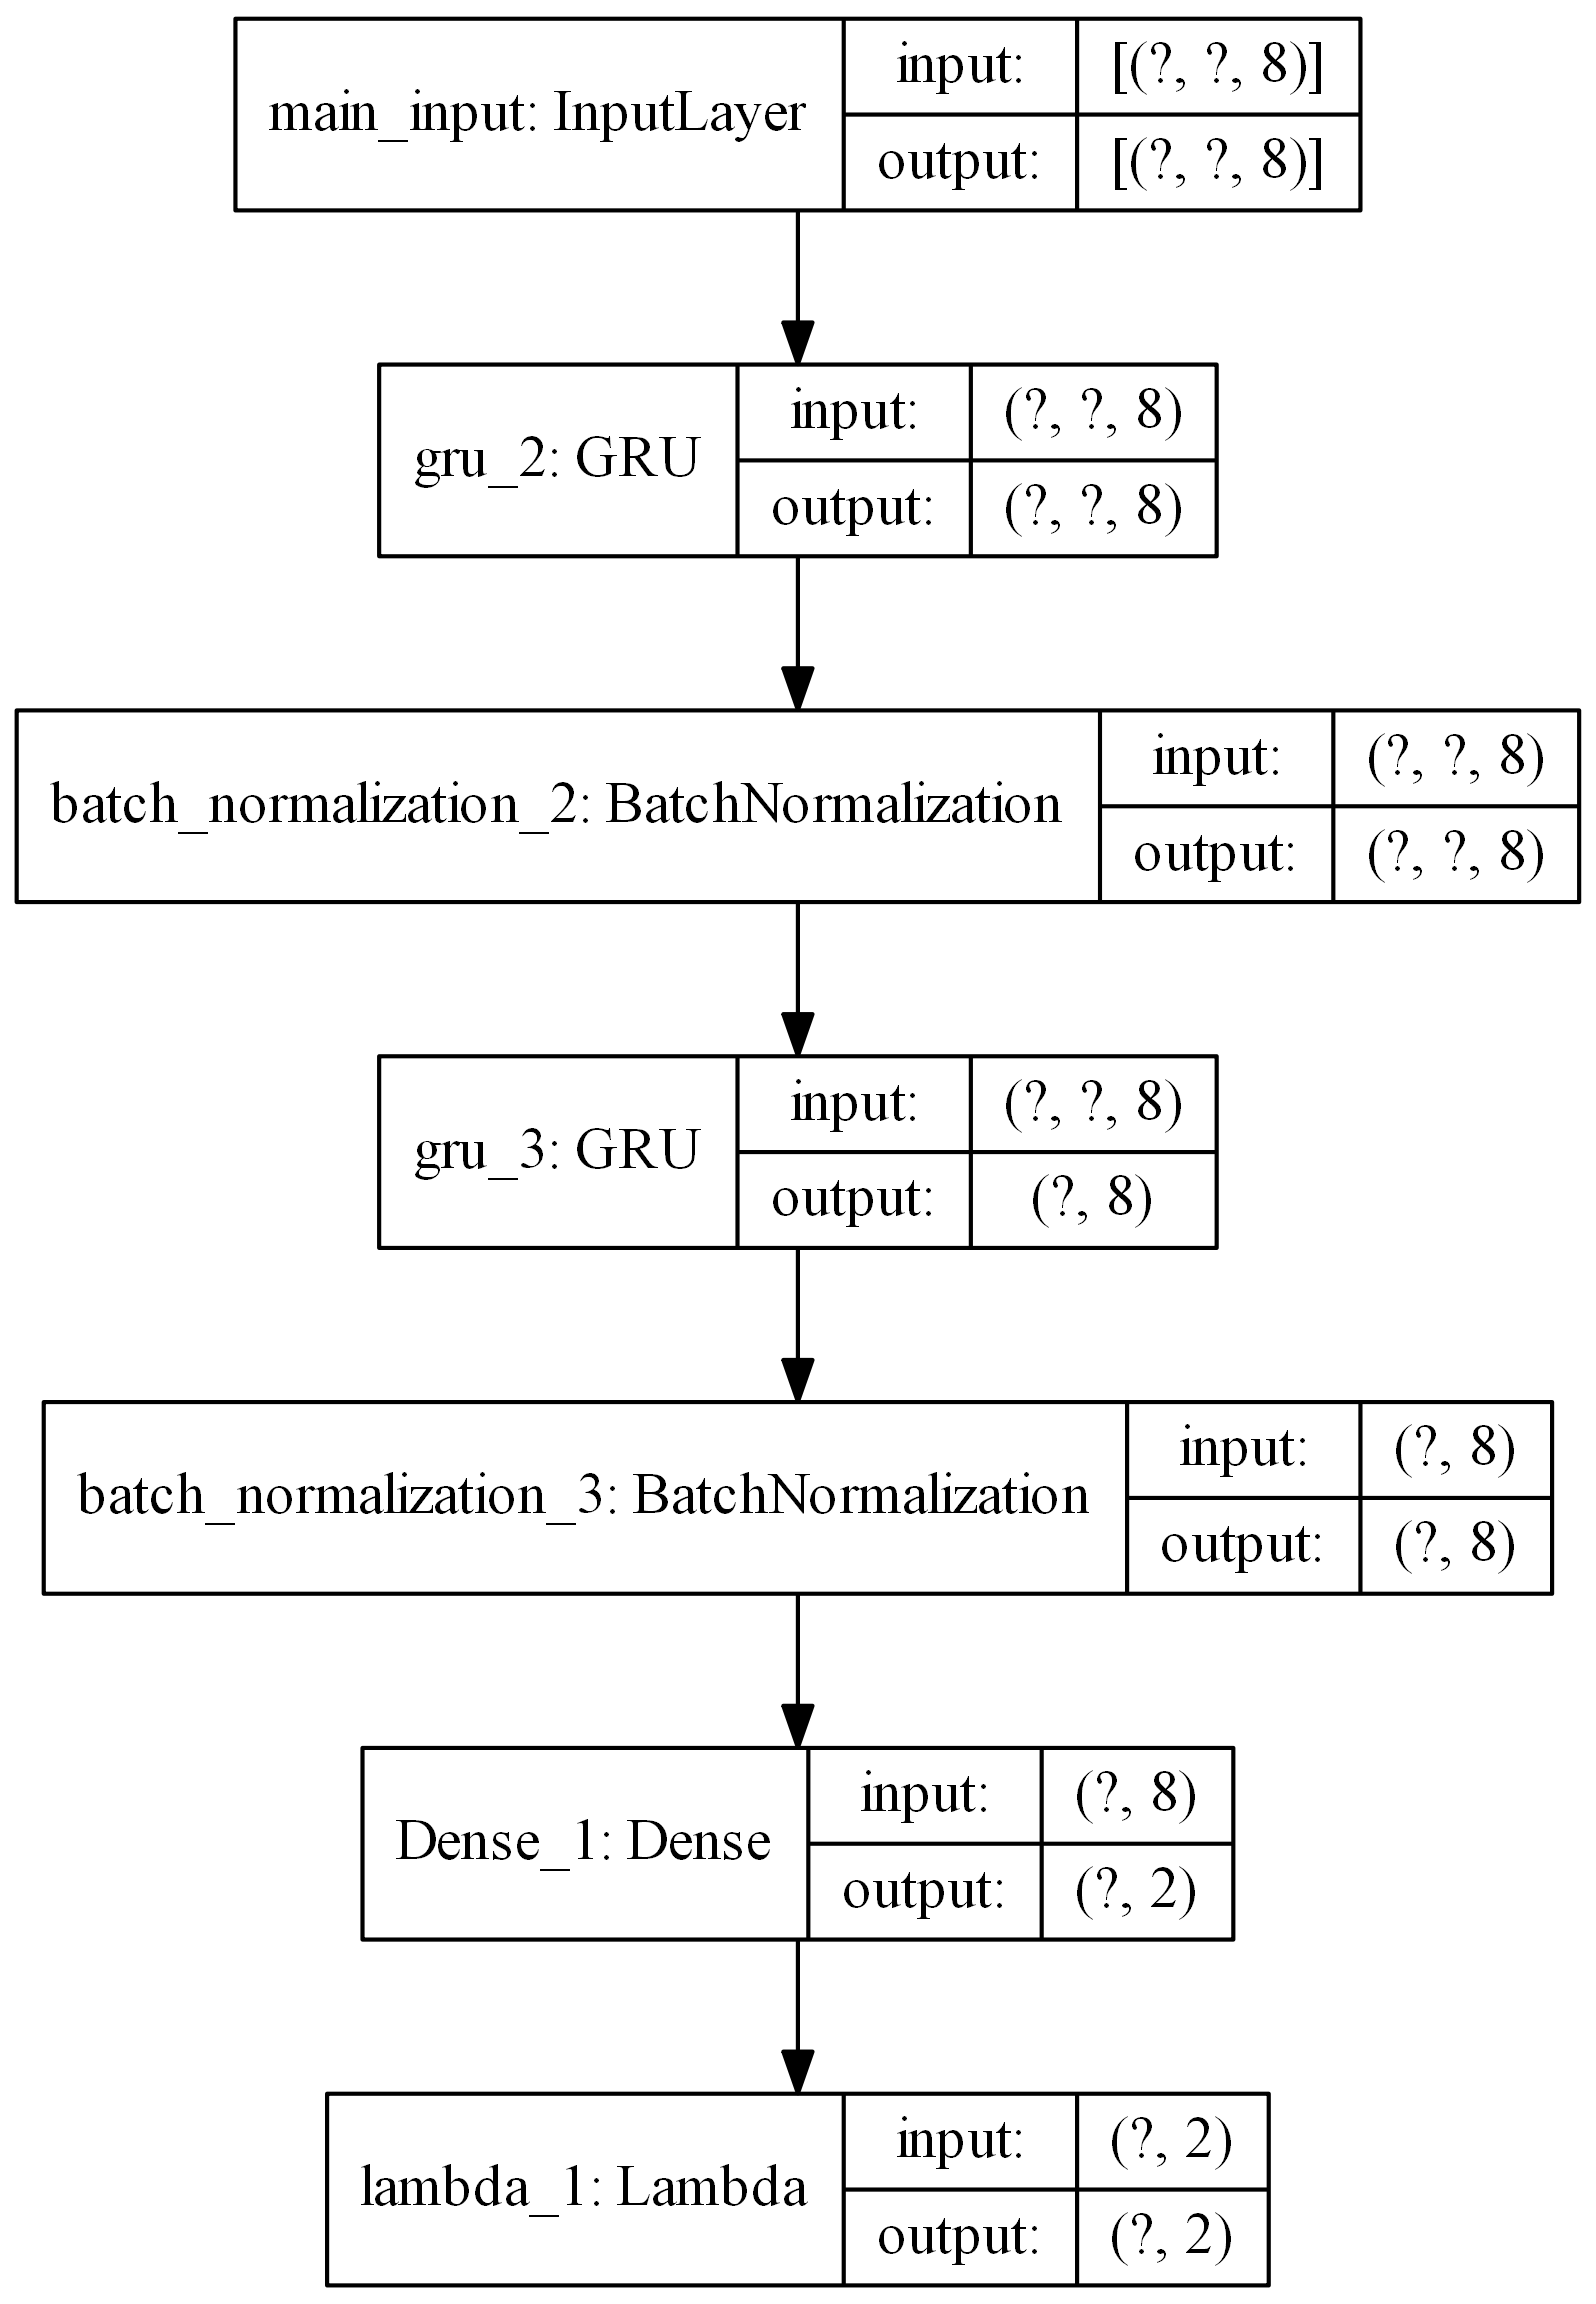

In [25]:
from tensorflow.keras.utils import plot_model
model = t2e_obj.model

plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='TR', expand_nested=False, dpi=300
)